In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('50_Startups.csv')

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


R&D Spend -- Research and devolop spend in the past few years                                                                   
Administration -- spend on administration in the past few years                                                                 
Marketing Spend -- spend on Marketing in the past few years                                                                     
State -- states from which data is collected                                                                                   
Profit  -- profit of each state in the past few years                                                                           

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,NaN,NaN,NaN,73721.6156,45902.256482,0.0,39936.37,73051.08,101602.8,165349.2
Administration,50.0,NaN,NaN,NaN,121344.6396,28017.802755,51283.14,103730.875,122699.795,144842.18,182645.56
Marketing Spend,50.0,NaN,NaN,NaN,211025.0978,122290.310726,0.0,129300.1325,212716.24,299469.085,471784.1
State,50,3,New York,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,50.0,NaN,NaN,NaN,112012.6392,40306.180338,14681.4,90138.9025,107978.19,139765.9775,192261.83


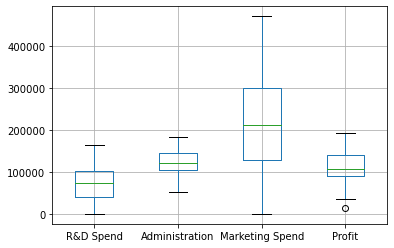

In [12]:
#Boxplot to understand the distribution of each varibale
data.boxplot()
plt.show()

<AxesSubplot:>

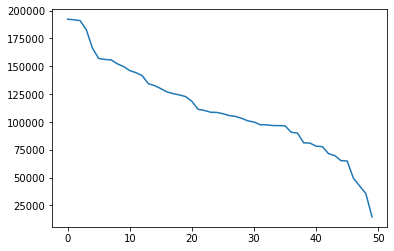

In [13]:
data["Profit"].plot(kind="line")

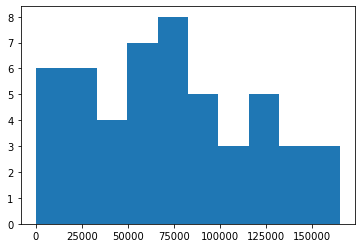

In [14]:
#Histogram of R&D spend
plt.hist(data=data,x='R&D Spend')
plt.show()

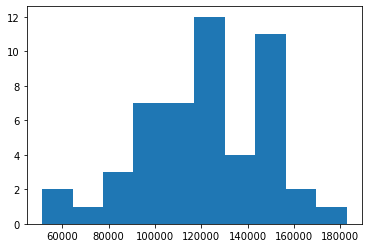

In [15]:
#Histogram of Adminstration
plt.hist(data=data,x='Administration')
plt.show()

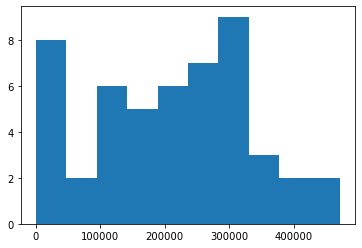

In [16]:
#Histogram for marketing spend
plt.hist(data=data,x='Marketing Spend')
plt.show()

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

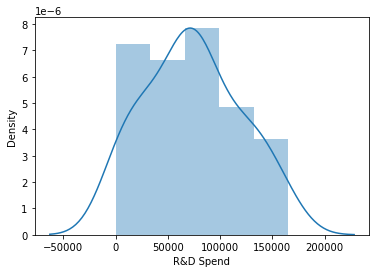

In [17]:
sns.distplot(data['R&D Spend'])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

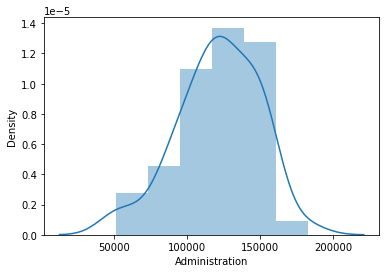

In [18]:
sns.distplot(data['Administration'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

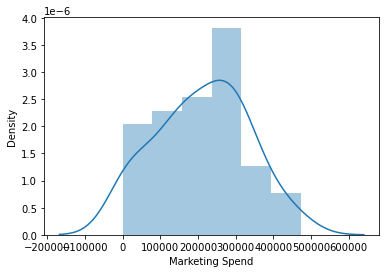

In [19]:
sns.distplot(data['Marketing Spend'])

In [20]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


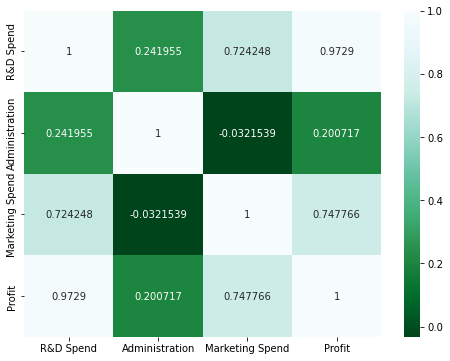

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include='number').corr(), fmt= 'g',cmap = 'BuGn_r',annot = True)
plt.show()

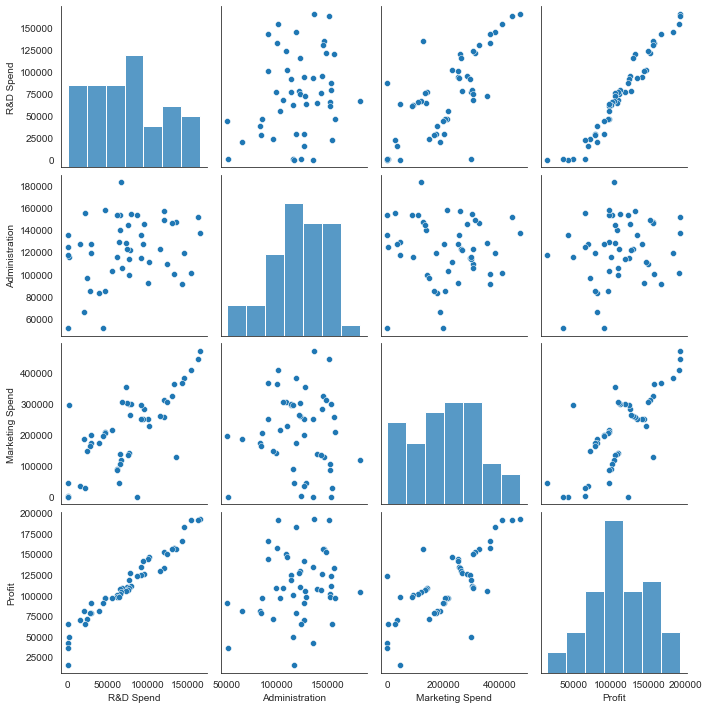

In [22]:
sns.set_style(style='white')
sns.pairplot(data)

# Preparing a model

In [23]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
# separating the other attributes from the predicting attributes 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [25]:
print(X)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [26]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [27]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [30]:
LR.fit(X_train, y_train)

LinearRegression()

In [31]:
y_prediction = LR.predict(X_test)
y_prediction

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
score = r2_score(y_test, y_prediction)
score

0.8987266414328636

In [33]:
print("Mean_Squared_Error is = ", mean_squared_error(y_test, y_prediction))

Mean_Squared_Error is =  82010363.04430111


In [34]:
print("root_mean_squared_error = ", np.sqrt(mean_squared_error(y_test, y_prediction)))

root_mean_squared_error =  9055.957323458471


In [35]:
score

0.8987266414328636

Score is 90%, it means we can use this model